<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Метод опорных векторов**

Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Изучить работу метода опорных векторов для решения задач классификации и регрессии, познакомиться с основными особенностями и вариациями данного метода. Изучить соответствующие классы библиотеки sklearn, их параметры и атрибуты, применимые на практике.

**Содержание работы**

1. Сгенерируйте линейно разделимый датасет для классификации из двух признаков. Постройте на нем опорно-векторный классификатор без ядра с параметром С=100. Изобразите границу принятия решения и линию зазора на графике.
2. Сгенерируйте линейно неразделимый датасет с зазором между классами. Повторите виуальный анализ на нем.
3. Сгенерируйте неразделимый датасет так, чтобы классы пересекались. Повторите построение и оценку метода опорных векторов на нем.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC

**Линейно разделимые данные**

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

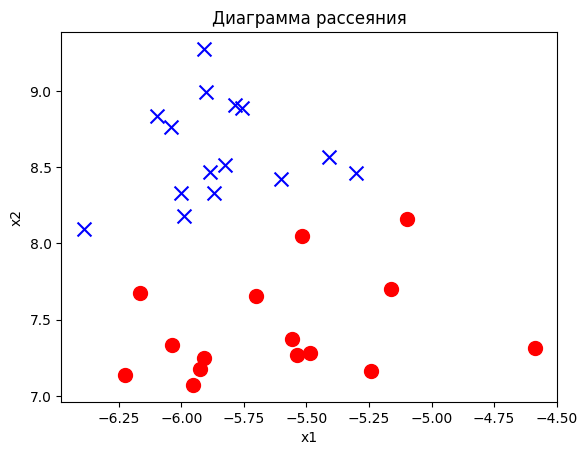

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
svm_linear.intercept_

array([-64.2533988])

Мы должны получить линейную границу

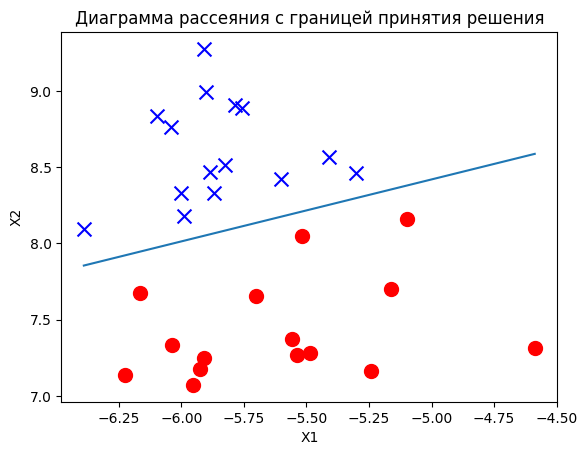

In [ ]:
X1 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
plt.plot(X1,-svm_linear.intercept_ / svm_linear.coef_[0][1] - svm_linear.coef_[0][0] * X1 / svm_linear.coef_[0][1])

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [ ]:
svm_linear.n_support_

array([1, 2], dtype=int32)

Мы видим на графике, какие точки метод счел опорными:

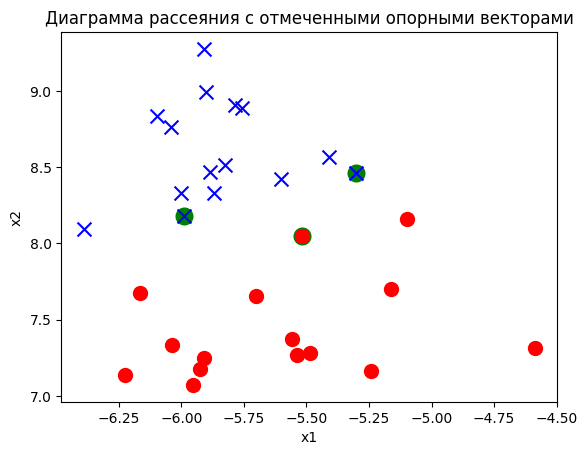

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],
            svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Если отступить отграницы принятия решений расстояние, соответствующее росту функции на единицу в обе стороны мы получим границы области зазора. Давайте построим эту границу:

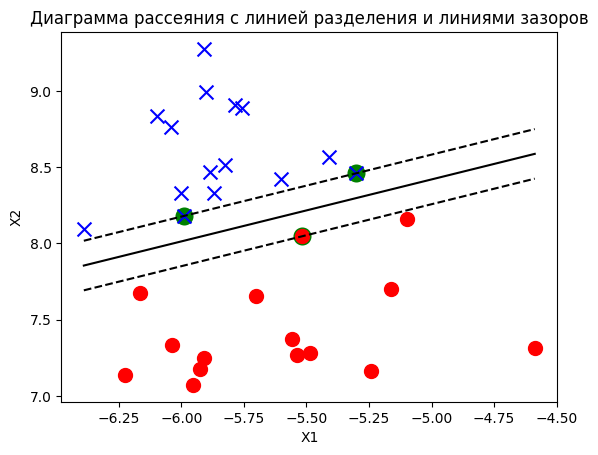

In [ ]:
plt.plot(X1,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X1, c='k')

plt.plot(X1,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X1,linestyle='--', c='k')
plt.plot(X1,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X1,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Мы видим, что граница принятия решения располагается ровно посередине зазора, а границы зазора проходят ровно через опорные вектора:

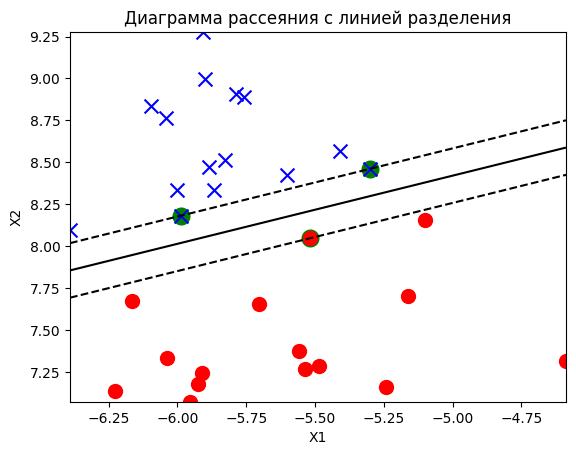

In [ ]:
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])
X1_grid, X2_grid = np.meshgrid(X1, X2)

Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X1_grid +  svm_linear.coef_[0][1] * X2_grid

plt.contour(X1_grid, X2_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

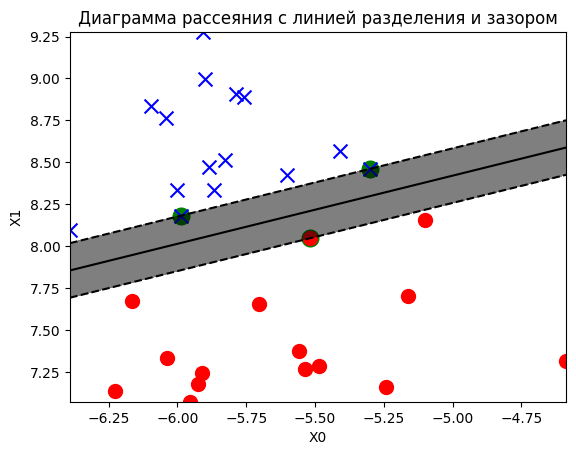

In [ ]:
plot_decision_regions(X, y, svm_linear)

In [ ]:
y_pred =  svm_linear.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 7.5]]

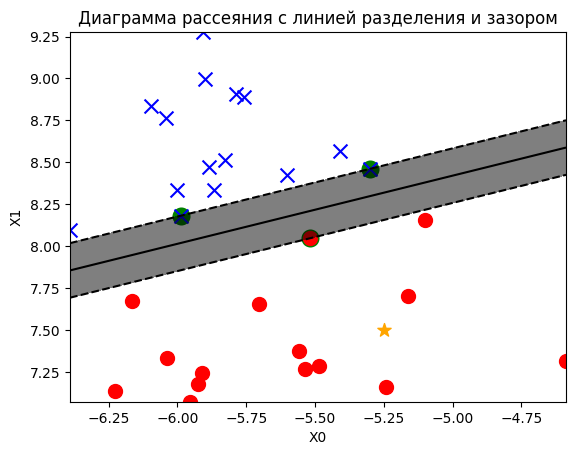

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [ ]:
svm_linear.predict(observation_new)

array([0])

**Вывод:** по результатам анализа видно, что построенная модель работает идеально. Но это только самый простой случай.

**Линейно неразделимые данные с зазором**

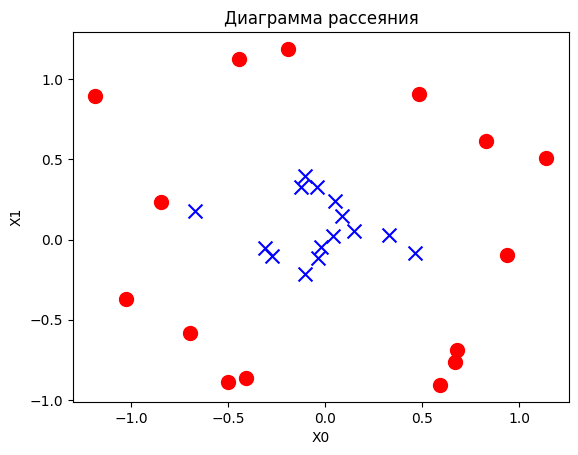

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

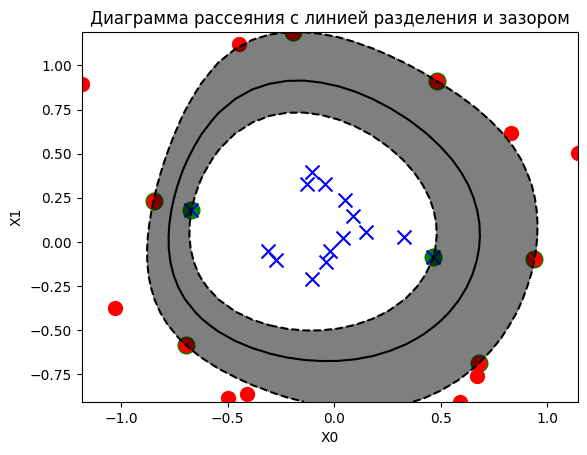

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

**Вывод:** здесь ясно видно, что за счет применения другой функции ядра, по сути - другой метрики расстояния между точками, граница принятия решения изгибается определенным образом. Но опорные вектора, как всегда - это наиболее близкие к другому классу точки. Только теперь расстояние (точнее, мера близости рассчитывается по-другому).

**Данные без зазора**

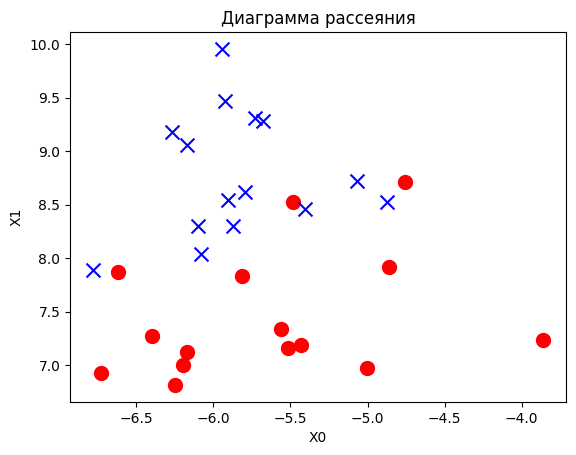

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

На диаграмме мы видим, что классы как бы "перемешиваются", никакого зазора между ними нет. В таком случае, нам нужно применить метод опорных векторов с так называемым мягким зазором. Это достигается уменьшением параметра регуляризации (С):

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

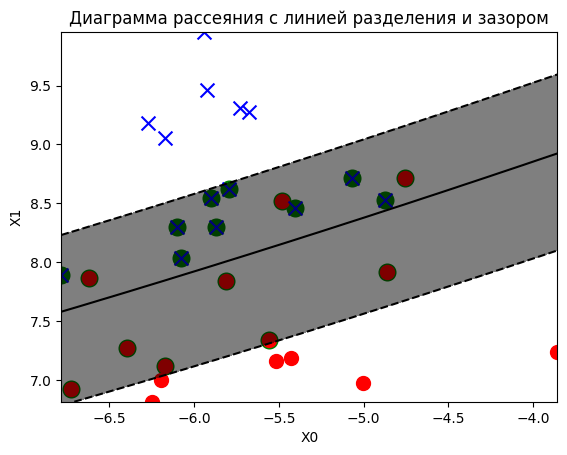

In [ ]:
plot_decision_regions(X, y, svm_poly)

**Вывод:** самое главное, что уменьшение регуляризации модели приводит к тому, что модель допускает некоторые погрешности в попадании точек в полосу зазора. За счет этого, модель все-таки формирует оптимальную разделяющую прямую.

In [ ]:
svm_poly.n_support_

array([9, 9], dtype=int32)

Можно сделать вывод, что чем меньше зазор между классами, тем менее эффективен метод опорных векторов.

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

**Вывод:** можно сделать вывод, что данная модель, хоть и не идеальная, все же довольно точно справляется с классификацией.

# **Задания для самостоятельного выполнения**

1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.
2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?
3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.
4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.
5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.
6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.
7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?
Примените метод опорных векторов для задачи множественной классификации.    
8. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.
9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.
10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

**1. Эксперимент с параметром C в SVC**

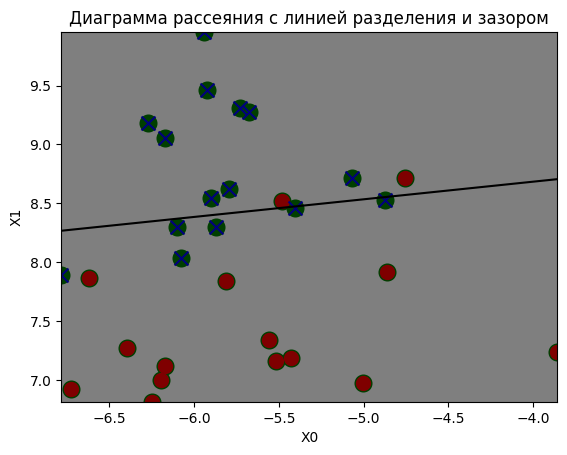

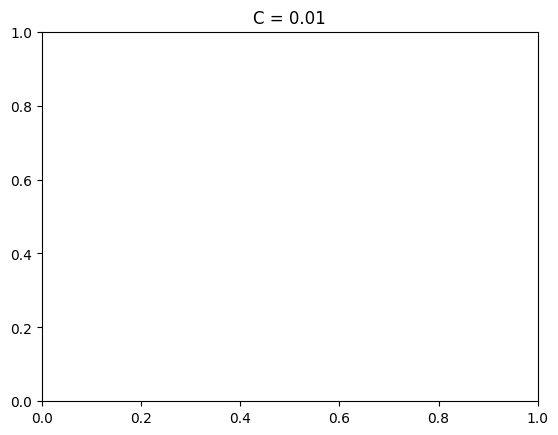

C=0.01, Количество опорных векторов: 30


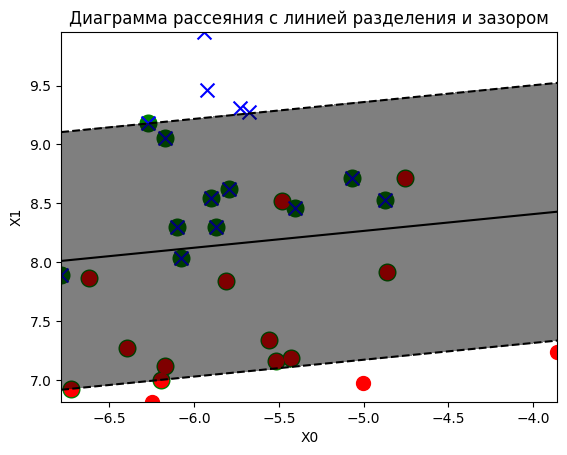

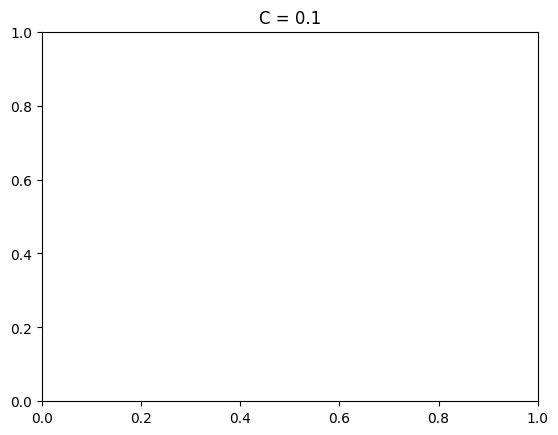

C=0.1, Количество опорных векторов: 23


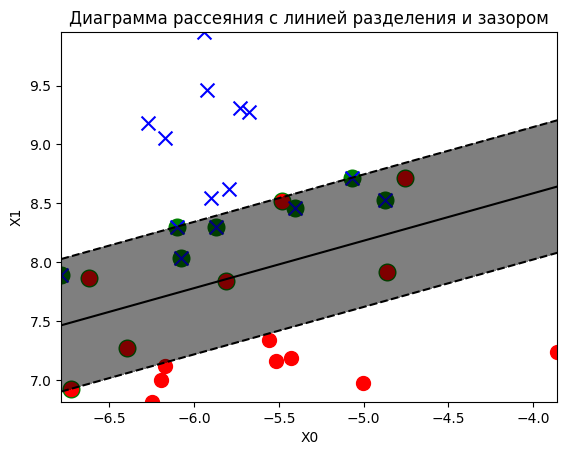

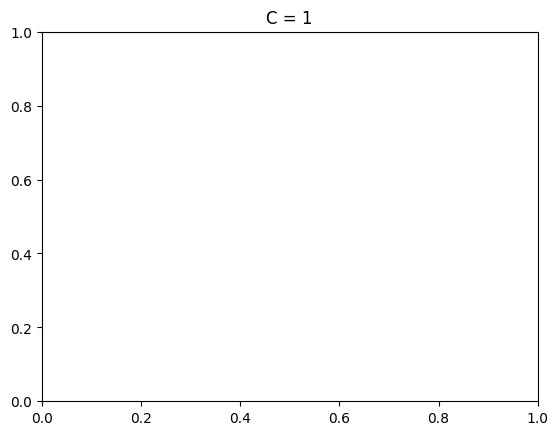

C=1, Количество опорных векторов: 14


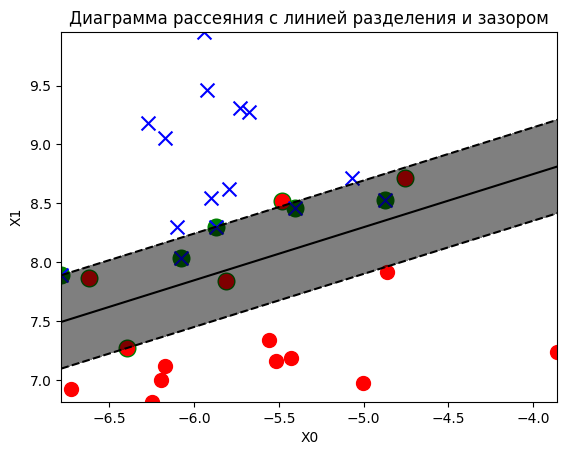

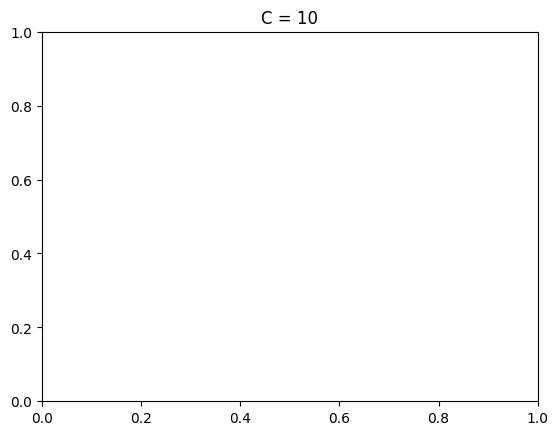

C=10, Количество опорных векторов: 10


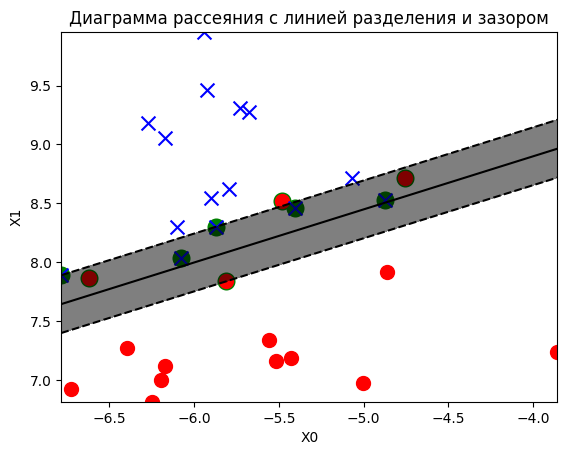

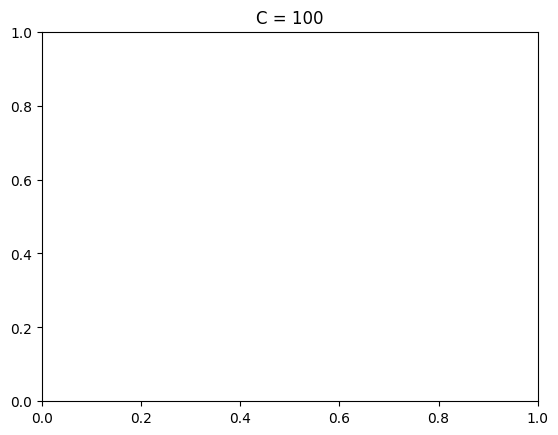

C=100, Количество опорных векторов: 9


In [ ]:
for C_value in [0.01, 0.1, 1, 10, 100]:
    svm = SVC(kernel='linear', C=C_value).fit(X, y)
    plot_decision_regions(X, y, svm)
    plt.title(f'C = {C_value}')
    plt.show()
    print(f"C={C_value}, Количество опорных векторов: {len(svm.support_vectors_)}")

**Вывод:** параметр C контролирует компромисс между максимизацией зазора и минимизацией ошибок классификации. Меньшие значения C дают более широкий зазор, но больше ошибок, большие значения C - уже зазор, но точнее классификация.

**2. Анализ предсказаний в разных зонах**

In [ ]:
observation_new = [[-5, 7], [0, 2], [0, 1.5]]  # Точки в разных зонах
for point in observation_new:
    print(f"Точка {point}: расстояние {svm_linear.decision_function([point])}, класс {svm_linear.predict([point])}")

Точка [-5, 7]: расстояние [-8.7295359], класс [0]
Точка [0, 2]: расстояние [-51.95973502], класс [0]
Точка [0, 1.5]: расстояние [-55.03315096], класс [0]


**Вывод:** точки по разные стороны границы получают разные классы. Если точка попадает внутрь зазора (между пунктирными линиями), значение decision_function по модулю меньше 1.

**3. Сравнение разных ядер**

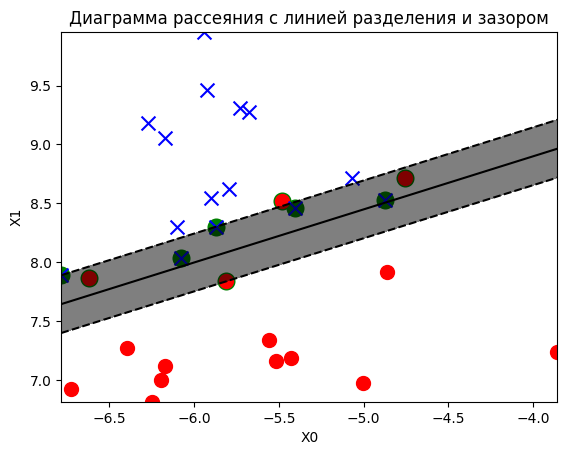

Ядро linear: Точность 0.9


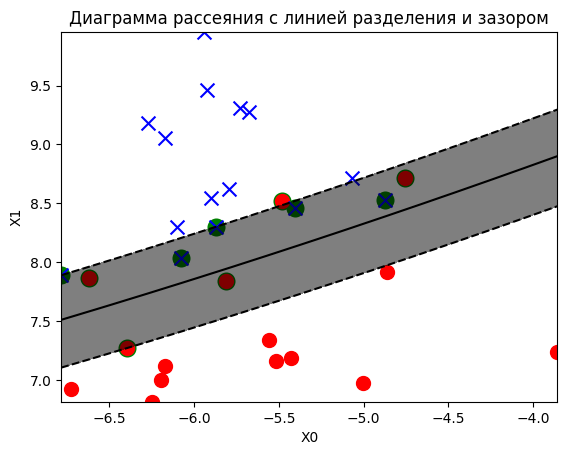

Ядро poly: Точность 0.9


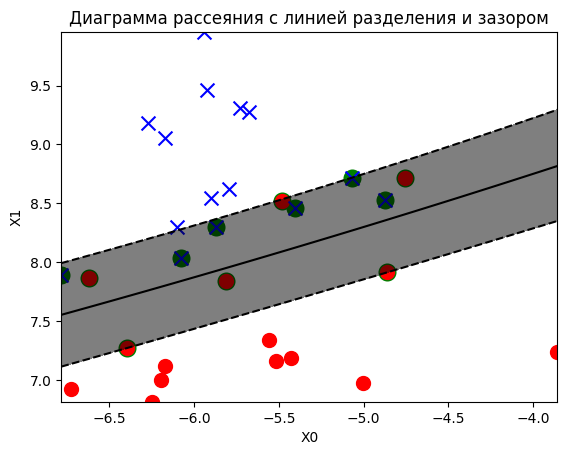

Ядро rbf: Точность 0.9


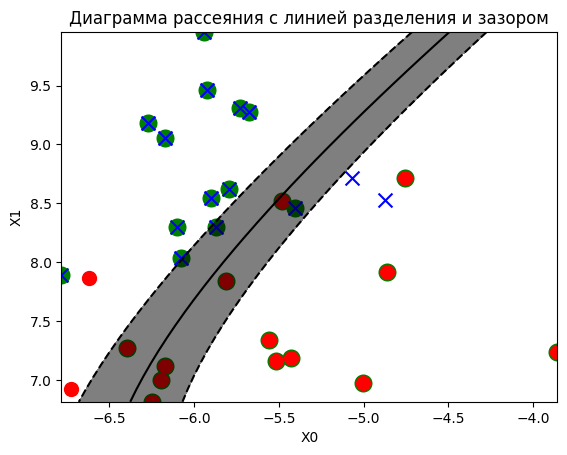

Ядро sigmoid: Точность 0.2


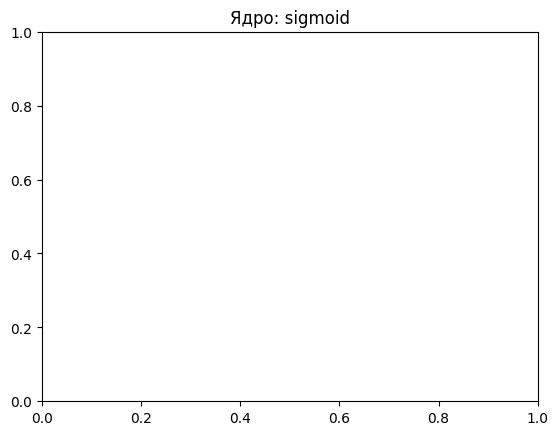

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel, C=100).fit(X, y)
    plot_decision_regions(X, y, svm)
    plt.title(f'Ядро: {kernel}')
    y_pred = svm.predict(X)
    print(f"Ядро {kernel}: Точность {metrics.accuracy_score(y, y_pred)}")

**4. Влияние C на несбалансированные данные**

**5. LinearSVC vs SVC**

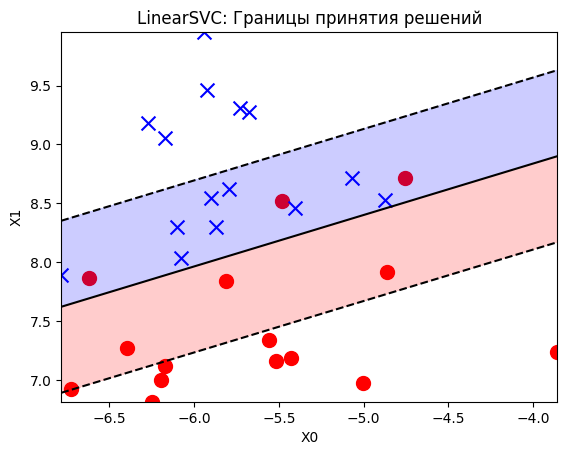

In [ ]:
from sklearn.svm import LinearSVC

# Создаем и обучаем LinearSVC
lsvc = LinearSVC(C=100, dual="auto").fit(X, y)  # `dual="auto"` для автоматического выбора метода

# Визуализация (адаптированная функция, так как LinearSVC не имеет support_vectors_)
def plot_linear_svc_decision_regions(X, y, model):
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    # Границы решения
    X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)

    plt.contour(X0_grid, X1_grid, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, levels=[-1, 0, 1], alpha=0.2, colors=['red', 'blue'])

    plt.title("LinearSVC: Границы принятия решений")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

plot_linear_svc_decision_regions(X, y, lsvc)

**6. Подбор параметров для большого датасета**

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=5, centers=2)
from sklearn.model_selection import GridSearchCV
params = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}
grid = GridSearchCV(SVC(), params).fit(X, y)
print(f"Лучшие параметры: {grid.best_params_}")

Лучшие параметры: {'C': 0.1, 'kernel': 'linear'}


**7. Тест производительности**

In [ ]:
import time
for n in [1000, 5000, 10000, 20000]:
    X, y = make_blobs(n_samples=n, n_features=5)
    start = time.time()
    SVC(kernel='rbf').fit(X, y)
    print(f"n={n}: Время обучения {time.time()-start:.2f} сек")

n=1000: Время обучения 0.01 сек
n=5000: Время обучения 0.01 сек
n=10000: Время обучения 0.03 сек
n=20000: Время обучения 0.10 сек


**8. Многоклассовая классификация python**

*1. Генерация датасета с тремя классами python*

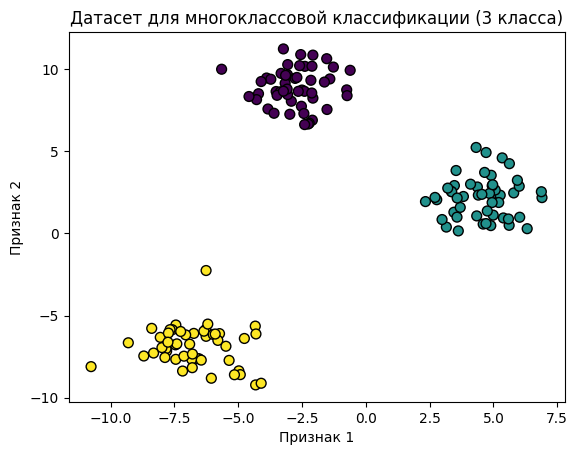

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Генерируем данные (3 класса)
X, y = make_blobs(n_samples=150, centers=3, random_state=42, cluster_std=1.2)

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title("Датасет для многоклассовой классификации (3 класса)")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

*2. Обучение SVM с RBF-ядром*

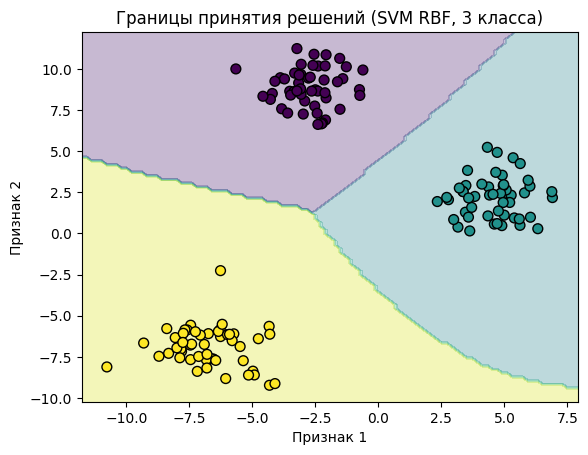

In [ ]:
# Обучаем SVM с RBF-ядром (подходит для нелинейных границ)
svm_rbf = SVC(kernel='rbf', C=10, decision_function_shape='ovo')  # 'ovo' = "one-vs-one"
svm_rbf.fit(X, y)

# Функция для визуализации границ принятия решений
def plot_multiclass_decision_boundary(X, y, model):
    # Сетка для предсказаний
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Предсказания для каждой точки сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title("Границы принятия решений (SVM RBF, 3 класса)")
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")
    plt.show()

plot_multiclass_decision_boundary(X, y, svm_rbf)

*3. Визуализация зазора (margin)*

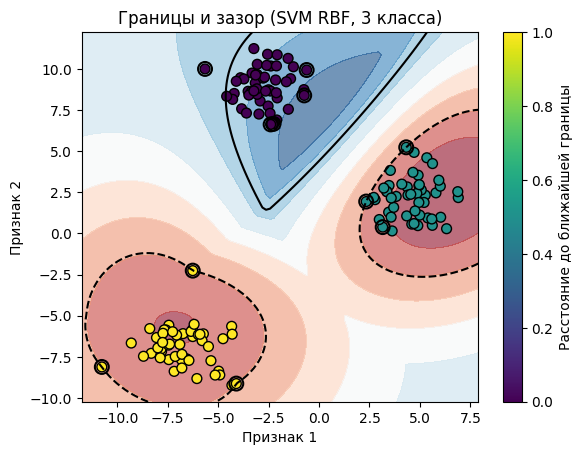

In [ ]:
def plot_svm_margin(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Получаем расстояния до границ для всех классификаторов
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Для визуализации используем минимальное расстояние до границы
    Z = np.min(Z, axis=1).reshape(xx.shape)

    # Визуализация
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 10), cmap='RdBu', alpha=0.6)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidths=1.5)
    plt.title("Границы и зазор (SVM RBF, 3 класса)")
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")
    plt.colorbar(label="Расстояние до ближайшей границы")
    plt.show()

plot_svm_margin(X, y, svm_rbf)

**Задание 9: Применение SVM на готовом датасете (Iris)**

*1. Загрузка и визуализация данных*

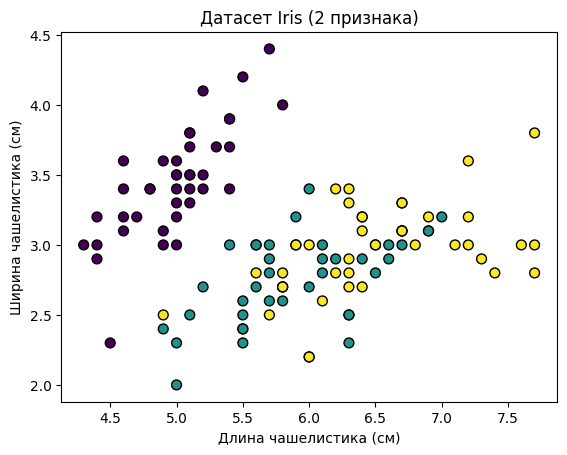

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Загружаем датасет Iris
iris = load_iris()
X_iris = iris.data[:, :2]  # Берём только 2 признака для визуализации
y_iris = iris.target

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Визуализация
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, edgecolors='k')
plt.title("Датасет Iris (2 признака)")
plt.xlabel("Длина чашелистика (см)")
plt.ylabel("Ширина чашелистика (см)")
plt.show()

*2. Обучение SVM и оценка точности*

In [ ]:
# Обучаем SVM с RBF-ядром
svm_iris = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_iris.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = svm_iris.predict(X_test)

# Оценка точности
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Точность модели: {accuracy_score(y_test, y_pred):.2f}")
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Точность модели: 0.90
Матрица ошибок:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


*3. Визуализация границ принятия решений*

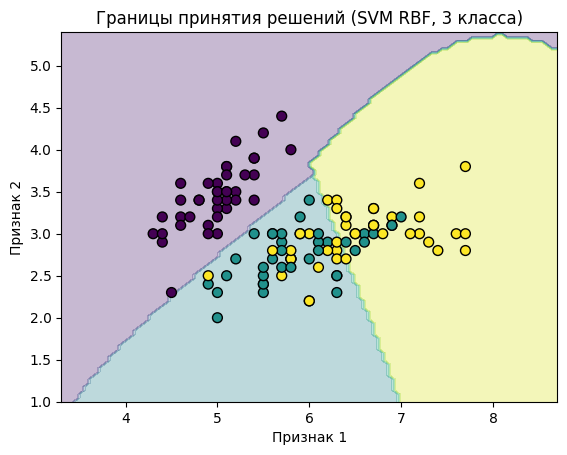

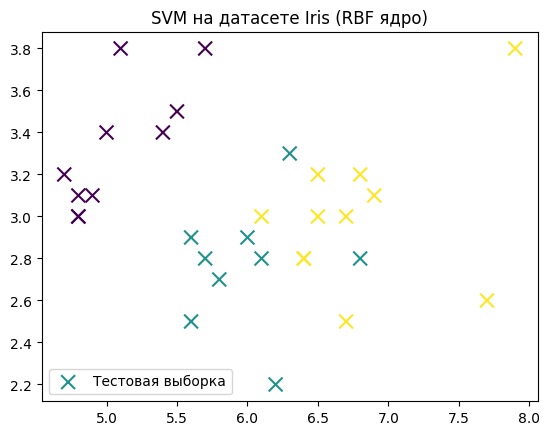

In [ ]:
plot_multiclass_decision_boundary(X_train, y_train, svm_iris)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=100, marker='x', label='Тестовая выборка')
plt.legend()
plt.title("SVM на датасете Iris (RBF ядро)")
plt.show()

**10. Регрессия SVR**

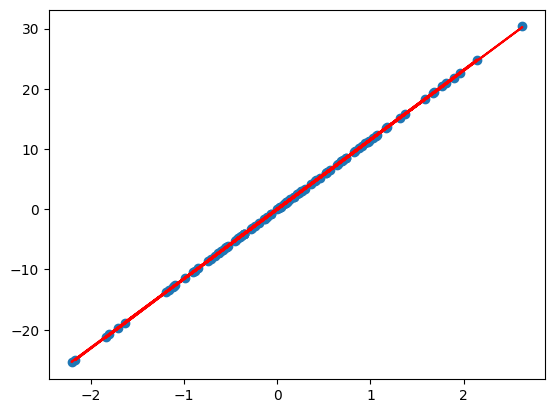

In [ ]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1)
svr = SVR(kernel='rbf', C=100).fit(X, y)
plt.scatter(X, y)
plt.plot(X, svr.predict(X), color='red')